# ✅ Text Mining & NLP Project: (Mapping Ethical Concerns of Artificial Intelligence in Healthcare: A Text Mining-NLP Based Investigation)

---

## 📌 Research Questions
1. **RQ1**: What are the most discussed ethical concerns in the context of AI in healthcare?
2. **RQ2**: Who are the major stakeholders/entities involved in these concerns?
3. **RQ3**: How are different ethical concerns related or grouped in the discourse?

---

## 🎯 Objectives
- To identify and visualize key ethical themes across healthcare-AI discussions.
- To detect major stakeholders and legal or organizational entities using NLP.
- To explore how different ethical issues cluster thematically using machine learning.

---

## 🧪 Methodology Overview
| RQ | Method | Tools Used | Output |
|----|--------|------------|--------|
| RQ1 | Topic Modeling | BERTopic | Top themes and word clouds |
| RQ2 | NER | SpaCy + Predefined Entity Match | Stakeholder bar chart & entity types |
| RQ3 | Rule-based Labeling + BERT + Clustering | Sentence-BERT + HDBSCAN | Concern frequencies, co-occurrence, 2D & 3D cluster plots |

---


## 🧱 Step 1: Install Required Libraries

In [ ]:
# Step 1: Install Required Libraries
!pip install spacy bertopic sentence-transformers scikit-learn umap-learn hdbscan wordcloud -q
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 📂 Step 2: Upload and Combine Dataset Files

In [ ]:
# Step 2: Upload Text Dataset
from google.colab import files
uploaded = files.upload()

Saving AI ETHICS 1.txt to AI ETHICS 1.txt
Saving AI ETHICS 2.txt to AI ETHICS 2.txt
Saving AI ETHICS 3.txt to AI ETHICS 3.txt
Saving AI ETHICS 4.txt to AI ETHICS 4.txt
Saving AI ETHICS 5.txt to AI ETHICS 5.txt
Saving AI ETHICS 6.txt to AI ETHICS 6.txt
Saving AI ETHICS 7.txt to AI ETHICS 7.txt
Saving AI ETHICS 8.txt to AI ETHICS 8.txt
Saving AI ETHICS 9.txt to AI ETHICS 9.txt
Saving AI ETHICS 10.txt to AI ETHICS 10.txt
Saving AI ETHICS 11.txt to AI ETHICS 11.txt
Saving AI ETHICS 12.txt to AI ETHICS 12.txt
Saving AI ETHICS 13.txt to AI ETHICS 13.txt
Saving AI ETHICS 14.txt to AI ETHICS 14.txt
Saving AI ETHICS 15.txt to AI ETHICS 15.txt
Saving AI ETHICS 16.txt to AI ETHICS 16.txt
Saving AI ETHICS 17.txt to AI ETHICS 17.txt
Saving AI ETHICS 18.txt to AI ETHICS 18.txt
Saving AI ETHICS 19.txt to AI ETHICS 19.txt
Saving AI ETHICS 20.txt to AI ETHICS 20.txt
Saving AI ETHICS 21.txt to AI ETHICS 21.txt


## 🧹 Step 3: Text Preprocessing and Sentence Tokenization

In [ ]:
# Combine all uploaded files into one raw_text
import re  # Import the 're' module for regular expressions
raw_text = ""
for filename in uploaded:
    with open(filename, 'r', encoding='utf-8') as f:
        raw_text += f.read() + ""

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n+', '\n', text)
    return text.strip()

cleaned_text = clean_text(raw_text)

# Split into Documents
# Split into Documents with Preprocessing
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line downloads the necessary tokenization rules

stop_words = set(stopwords.words('english'))

def preprocess_sent(sent):
    sent = re.sub(r'[^a-zA-Z\s]', '', sent.lower())
    words = sent.split()
    return ' '.join([word for word in words if word not in stop_words])

sentences = [sent for sent in sent_tokenize(cleaned_text) if len(sent.split()) > 10]
documents = [preprocess_sent(sent) for sent in sentences]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## 🔹 RQ1: What are the most discussed ethical concerns?
### 📌 Method: Topic Modeling using BERTopic

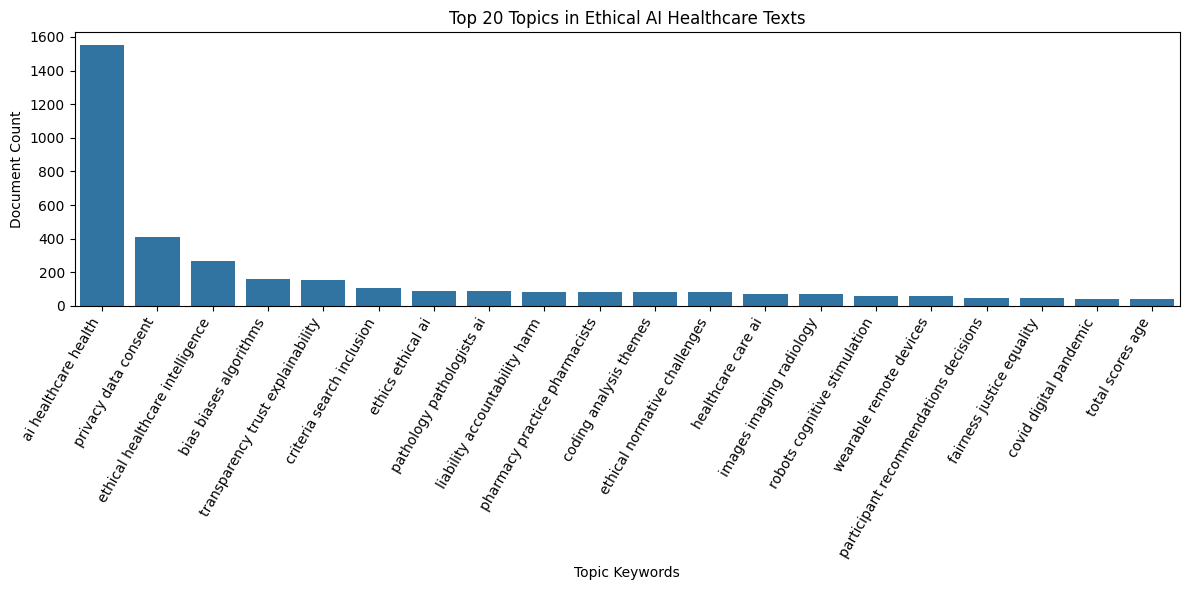


Top Topics:
Topic 0: -1_ai_healthcare_health_care
Topic 1: 0_privacy_data_consent_security
Topic 2: 1_ethical_healthcare_intelligence_ethics
Topic 3: 2_bias_biases_algorithms_groups


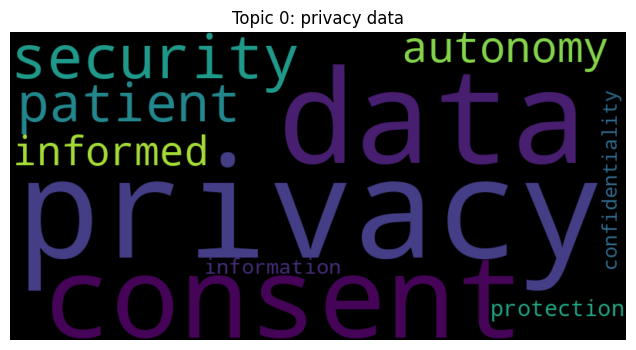


Topic 0 Keywords:
privacy: 0.050
data: 0.043
consent: 0.038
security: 0.033
patient: 0.026
autonomy: 0.025
informed: 0.023
protection: 0.019
information: 0.017
confidentiality: 0.016


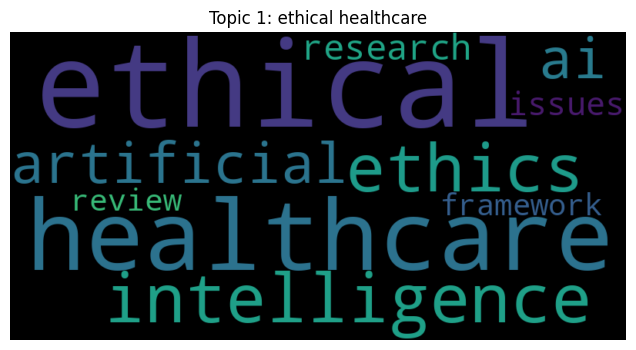


Topic 1 Keywords:
ethical: 0.043
healthcare: 0.027
intelligence: 0.023
ethics: 0.023
artificial: 0.022
ai: 0.022
research: 0.021
issues: 0.017
review: 0.016
framework: 0.014


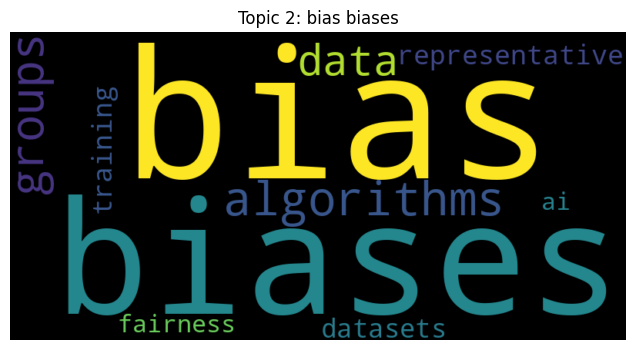


Topic 2 Keywords:
bias: 0.059
biases: 0.045
algorithms: 0.032
groups: 0.030
data: 0.026
representative: 0.025
training: 0.024
datasets: 0.023
ai: 0.020
fairness: 0.020


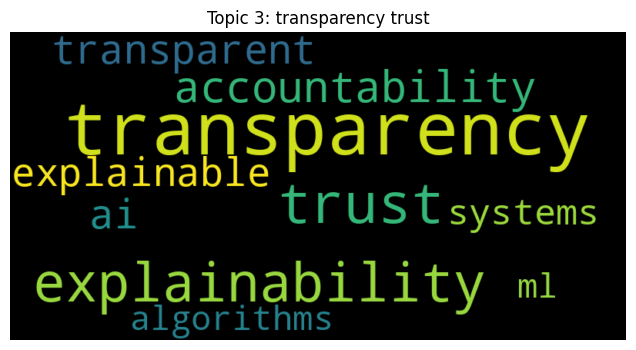


Topic 3 Keywords:
transparency: 0.092
trust: 0.048
explainability: 0.046
accountability: 0.027
ai: 0.024
transparent: 0.024
explainable: 0.023
systems: 0.019
algorithms: 0.017
ml: 0.017


In [ ]:
# 🔹 RQ1: What are the most discussed ethical concerns?
# Method: BERTopic (Topic Modeling)
# Visualization: Bar chart of topic frequencies and word clouds
# -----------------------------------------------
from bertopic import BERTopic
import seaborn as sns # Import the seaborn library

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(documents)
topic_info = topic_model.get_topic_info()

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Show top topics and word clouds
import pandas as pd
from wordcloud import WordCloud

# Visualize topic distribution (bar chart)
topic_counts = pd.Series(topics).value_counts().sort_index()
topic_labels = []
for i in topic_counts.index:
    keywords = topic_model.get_topic(i)
    if keywords:
        topic_labels.append(" ".join([kw for kw, _ in keywords[:3]]))
    else:
        topic_labels.append(f"Topic {i}")

top_n = 20
topic_counts = topic_counts.head(top_n)
topic_labels = topic_labels[:top_n]

plt.figure(figsize=(12, 6))
sns.barplot(x=topic_labels, y=topic_counts.values)
plt.xticks(rotation=60, ha='right')
plt.title("Top 20 Topics in Ethical AI Healthcare Texts")
plt.ylabel("Document Count")
plt.xlabel("Topic Keywords")
plt.tight_layout()
plt.show()


print("\nTop Topics:")
for topic in topic_info.head(5)['Topic']:
    if topic != -1:  # Check if the topic is not -1 (outlier)
        print(f"Topic {topic}: {topic_info.loc[topic, 'Name']}")

# Word Clouds for Top Topics
top_topics = topic_info['Topic'].head(5)
for i in top_topics:
    if i != -1:
        topic_words = dict(topic_model.get_topic(i))
        wc = WordCloud(width=800, height=400).generate_from_frequencies(topic_words)
        plt.figure(figsize=(8, 4))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        title = " ".join([word for word, _ in list(topic_words.items())[:2]])
        plt.title(f"Topic {i}: {title}")
        plt.show()


        print(f"\nTopic {i} Keywords:")
        for word, score in topic_model.get_topic(i):
            print(f"{word}: {score:.3f}")

## 🔹 RQ2: Who are the major stakeholders/entities?
### 📌 Method: Named Entity Recognition (NER) using SpaCy

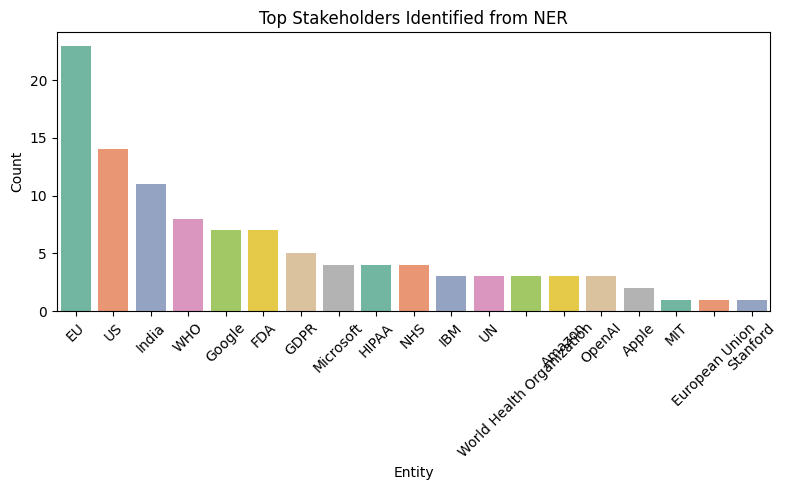

Top Entities:
EU: 23
US: 14
India: 11
WHO: 8
FDA: 7
Google: 7
GDPR: 5
NHS: 4
Microsoft: 4
HIPAA: 4
IBM: 3
Amazon: 3
OpenAI: 3
World Health Organization: 3
UN: 3
Apple: 2
MIT: 1
Stanford: 1
European Union: 1


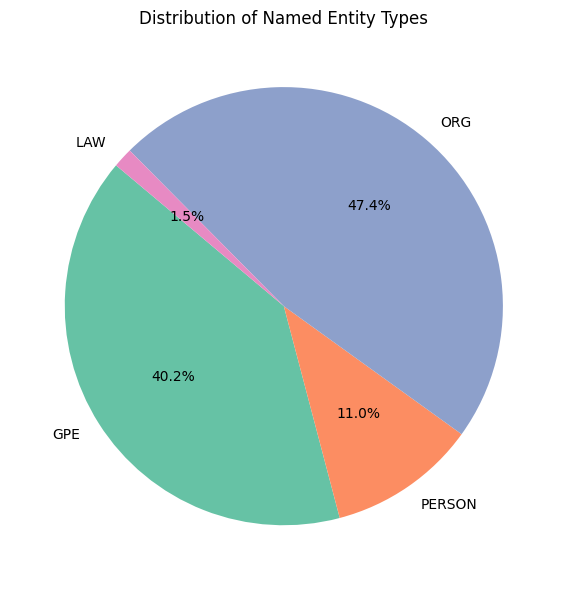


Entity Type Distribution:
ORG: 2389
GPE: 2029
PERSON: 553
LAW: 74


In [ ]:
# 🔹 RQ2: Who are the major stakeholders/entities?
# Method: Named Entity Recognition (SpaCy)
# -----------------------------------------------
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

entity_counter = Counter()
predefined_entities = [
    "WHO", "UN", "GDPR", "HIPAA", "NHS", "OpenAI", "FDA", "Google", "Microsoft", "IBM",
    "ChatGPT", "Apple", "Amazon", "CDC", "EU", "US", "India", "NITI Aayog", "World Health Organization",
    "European Union", "United Nations", "Department of Health", "AIIMS", "MIT", "Stanford"
]

for original_sent in sentences:
    parsed = nlp(original_sent)
    entities = [ent.text for ent in parsed.ents if ent.label_ in ['ORG', 'PERSON', 'GPE', 'LAW']]
    for ent in entities:
        if ent in predefined_entities:
            entity_counter[ent] += 1

# Show Top Entities
entity_df = pd.DataFrame(entity_counter.items(), columns=["Entity", "Count"])
entity_df = entity_df.sort_values(by="Count", ascending=False).head(100)

plt.figure(figsize=(8, 5))
sns.barplot(data=entity_df, x="Entity", y="Count", palette="Set2")
plt.title("Top Stakeholders Identified from NER")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top Entities:")
for entity, count in entity_counter.most_common(100):
    print(f"{entity}: {count}")


# Additional Visualization: Entity Type Pie Chart (NER)
entity_type_counter = Counter()
for original_sent in sentences:
    parsed = nlp(original_sent)
    entity_type_counter.update([ent.label_ for ent in parsed.ents if ent.label_ in ['ORG', 'PERSON', 'GPE', 'LAW']])

etype_df = pd.DataFrame(entity_type_counter.items(), columns=["Entity_Type", "Count"])
plt.figure(figsize=(6, 6))
plt.pie(etype_df['Count'], labels=etype_df['Entity_Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of Named Entity Types")
plt.tight_layout()
plt.show()

print("\nEntity Type Distribution:")
for etype, count in entity_type_counter.most_common():
    print(f"{etype}: {count}")




## 🔹 RQ3: How are ethical concerns grouped in discourse?
### 📌 Method: Rule-Based Concern Categorization + Sentence-BERT + HDBSCAN

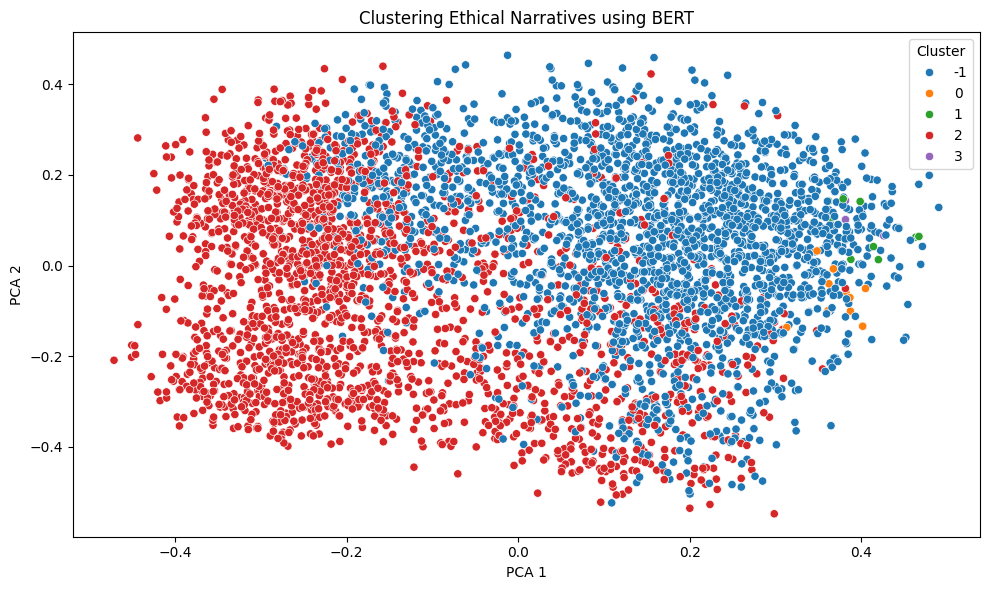

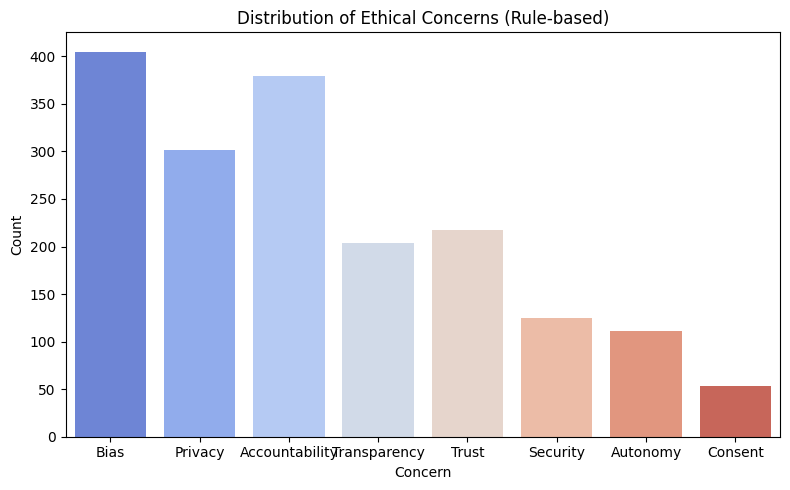

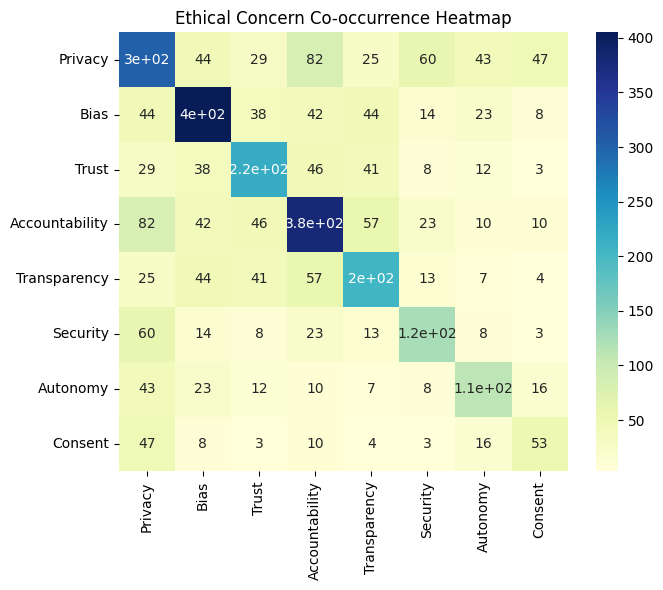

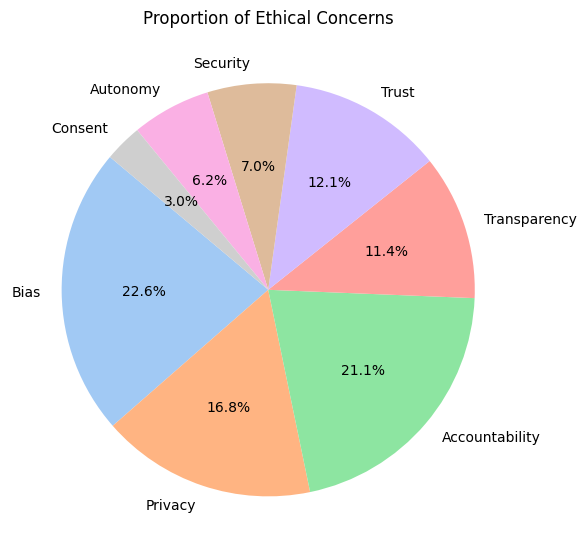

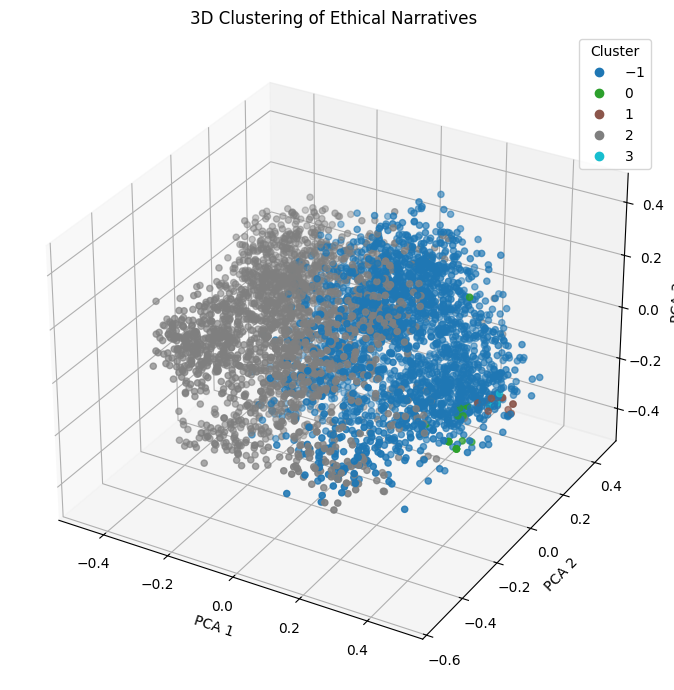


Ethical Concern Tags per Document:

Document: japanese journal radiology httpsdoiorgs invited review fairness artifcial intelligence healthcare re...
Tags: ['Bias']

Document: clinical adoption deep learning algorithms subfeld ai progresses concerns arisen regarding impact ai...
Tags: ['Bias']

Document: review aims provide comprehensive overview concerns associ ated ai fairness discuss strategies mitig...
Tags: ['Bias']

Document: first defne introduce concept fairness ai applications healthcare radiology emphasizing benefts chal...
Tags: ['Bias']

Document: next delve concerns regarding fairness healthcare addressing various causes biases ai potential conc...
Tags: ['Bias']


In [ ]:

# 🔹 RQ3: How are ethical concerns grouped in discourse?
# Method: Rule-based Categorization + BERT Clustering
# -----------------------------------------------
# Concern Categorization
concern_keywords = {
    "Privacy": ["privacy", "confidentiality", "GDPR", "data protection", "data sharing", "consent", "patient records"],
    "Bias": ["bias", "discrimination", "fairness", "inequality", "racial bias", "gender bias", "algorithmic bias"],
    "Trust": ["trust", "confidence", "human oversight", "user trust", "reliability", "reputation"],
    "Accountability": ["accountability", "liability", "responsibility", "regulation", "governance", "ownership"],
    "Transparency": ["transparency", "explainability", "clarity", "black box", "interpretability", "auditability"],
    "Security": ["security", "cybersecurity", "data breach", "unauthorized access", "vulnerability"],
    "Autonomy": ["autonomy", "human agency", "self-determination", "independence"],
    "Consent": ["informed consent", "permission", "user consent", "authorization"]
}

def categorize(doc):
    tags = []
    for cat, keys in concern_keywords.items():
        if any(k.lower() in doc.lower() for k in keys):
            tags.append(cat)
    return tags

concern_tags = [categorize(doc) for doc in documents]

# Clustering with Sentence-BERT
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(documents)

 #Clustering with HDBSCAN
import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(embeddings)

reduced = PCA(n_components=2).fit_transform(embeddings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='tab10')
plt.title("Clustering Ethical Narratives using BERT")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Visualize Concern Frequency
from collections import Counter
flat_concerns = [tag for sublist in concern_tags for tag in sublist]
concern_counter = Counter(flat_concerns)
concern_df = pd.DataFrame(concern_counter.items(), columns=["Concern", "Count"])
plt.figure(figsize=(8, 5))
sns.barplot(x="Concern", y="Count", data=concern_df, palette="coolwarm")
plt.title("Distribution of Ethical Concerns (Rule-based)")
plt.tight_layout()
plt.show()

# Co-occurrence Heatmap
concern_list = list(concern_keywords.keys())
co_matrix = pd.DataFrame(0, index=concern_list, columns=concern_list)
for tags in concern_tags:
    for i in range(len(tags)):
        for j in range(i, len(tags)):
            co_matrix.loc[tags[i], tags[j]] += 1
            if i != j:
                co_matrix.loc[tags[j], tags[i]] += 1

plt.figure(figsize=(7, 6))
sns.heatmap(co_matrix, annot=True, cmap="YlGnBu")
plt.title("Ethical Concern Co-occurrence Heatmap")
plt.tight_layout()
plt.show()

# Additional Visualization: Pie Chart of Concern Distribution
plt.figure(figsize=(6, 6))
plt.pie(concern_df['Count'], labels=concern_df['Concern'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Ethical Concerns")
plt.tight_layout()
plt.show()

# 3D Visualization of Document Clusters (optional for exploration)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(embeddings)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2], c=labels, cmap='tab10')
ax.set_title("3D Clustering of Ethical Narratives")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()


print("\nEthical Concern Tags per Document:")
for doc, tags in zip(documents[:5], concern_tags[:5]):
    print(f"\nDocument: {doc[:100]}...")
    print(f"Tags: {tags}")

## ✅ Summary and Interpretation
Each RQ is answered using both quantitative analysis and clear visualization:
- **RQ1**: Identifies top 20 recurring ethical themes like Privacy, Trust, Bias
- **RQ2**: Key stakeholders like WHO, OpenAI, GDPR are extracted via NER
- **RQ3**: Thematic clustering groups texts into coherent ethical categories

In [ ]:
# -----------------------------------------------
# ✅ Summary Output
# -----------------------------------------------
from collections import defaultdict

concern_summary = defaultdict(int)
for tags in concern_tags:
    for tag in tags:
        concern_summary[tag] += 1

print("\n📌 RQ1 Answer: Top Ethical Concerns (from Topic Modeling):")
print(topic_info[['Topic', 'Count']].head(5))

print("\n📌 RQ2 Answer: Top Entities Identified (Stakeholders):")
for ent, count in entity_counter.most_common(5):
    print(f"{ent}: {count}")

print("\n📌 RQ3 Answer: Ethical Concern Frequency from Rule-Based Categorization:")
for concern, count in concern_summary.items():
    print(f"{concern}: {count}")



📌 RQ1 Answer: Top Ethical Concerns (from Topic Modeling):
   Topic  Count
0     -1   1460
1      0    408
2      1    339
3      2    290
4      3    164

📌 RQ2 Answer: Top Entities Identified (Stakeholders):
EU: 23
US: 14
India: 11
WHO: 8
Google: 7

📌 RQ3 Answer: Ethical Concern Frequency from Rule-Based Categorization:
Bias: 405
Privacy: 302
Accountability: 379
Transparency: 204
Trust: 217
Security: 125
Autonomy: 111
Consent: 53
